<a href="https://colab.research.google.com/github/Yiyaoo/FDS_first_step/blob/master/fds_fourrage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import io
import glob


In [56]:
import requests
#read files from github
url="https://raw.githubusercontent.com/Yiyaoo/FDS_first_step/master/FDS_Fourrage/FDS_FOURRAGE_2000.csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')),sep=';')

In [57]:
#read multiples files from github

def read_multi_csv(start_year,end_year):
    years = list(range(start_year,end_year+1))
    dfs = []
    for YYYY in years:
        #file = 'https://raw.githubusercontent.com/username/project/main/data/normalized/'+str(YYYY)+'_crimes_byState.csv'
        file = 'https://raw.githubusercontent.com/Yiyaoo/FDS_first_step/master/FDS_Fourrage/FDS_FOURRAGE_'+str(YYYY)+'.csv'
        #print (file)
        df = pd.read_csv(file,sep=';')
        dfs.append(df)
    all_dfs = pd.concat(dfs)
    return all_dfs

df=read_multi_csv(2000,2020)

In [ ]:
result = df.dtypes
print(result)

NOM          object
ANNREF        int64
FRANCE       object
FRDOM        object
REGION       object
DEP          object
N306         object
N306_MOD     object
N306_LIB     object
N027         object
N027_MOD    float64
N027_LIB     object
VALEUR      float64
QUALITE      object
dtype: object


In [ ]:
df.isna().sum()

NOM            0
ANNREF         0
FRANCE         0
FRDOM          0
REGION         0
DEP            0
N306           0
N306_MOD       0
N306_LIB       0
N027           0
N027_MOD       0
N027_LIB       0
VALEUR      5434
QUALITE        0
dtype: int64

In [ ]:
#données manquantes par type de culture et par année
df_rend=df[(df.N027_MOD==70.02)]
df_rend['VALEUR'].isnull().groupby(df_rend.N306_LIB).sum()

N306_LIB
Autres fourrages annuels, n.c.a.                                            605
Autres prairies artificielles                                                12
Fourrages annuels                                                          2336
Fourrages annuels, prairies non permanentes et STH                         2446
Luzerne pour déhydratation                                                    0
Maïs fourrage et ensilage (plante entière)                                    0
Maïs fourrage et ensilage (plante entière) irrigué                            0
Maïs fourrage et ensilage (plante entière) non irrigué                       35
Prairie artificielle (luzerne, trèfle violet, ...)                            0
Prairies naturelles ou semées depuis plus de 6 ans                            0
Prairies non permanentes                                                      0
Prairies non permanentes et STH                                               0
Prairies temporaires           

In [ ]:
df_rend['VALEUR'].isnull().groupby(df_rend.ANNREF).sum()

ANNREF
2000    216
2001    216
2002    216
2003    216
2004    216
2005    215
2006    216
2007    230
2008    231
2009    230
2010    232
2011    236
2012    234
2013    238
2014    239
2015    238
2016    363
2017    363
2018    363
2019    363
2020    363
Name: VALEUR, dtype: int64

In [ ]:
#données semblant anormales / type de culture
#df.groupby(df.N306_LIB).describe()['VALEUR']
df_rend.groupby(df_rend.N306_LIB).describe()['VALEUR']

,count,mean,std,min,25%,50%,75%,max
N306_LIB,,,,,,,,
"Autres fourrages annuels, n.c.a.",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Autres prairies artificielles,2347.0,81.279591,42.523051,0.0,65.000,80.00,97.000,1380.0
Fourrages annuels,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Fourrages annuels, prairies non permanentes et STH",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Luzerne pour déhydratation,1080.0,62.844537,47.837760,0.0,0.000,80.00,101.100,180.0
Maïs fourrage et ensilage (plante entière),2336.0,108.860445,31.572925,0.0,91.075,114.10,130.000,190.0
Maïs fourrage et ensilage (plante entière) irrigué,1301.0,107.211991,56.262788,0.0,86.000,123.00,147.900,211.1
Maïs fourrage et ensilage (plante entière) non irrigué,2301.0,105.264841,34.465417,0.0,88.000,110.00,130.000,190.0
"Prairie artificielle (luzerne, trèfle violet, ...)",2359.0,81.182705,27.548312,0.0,67.000,82.00,98.000,180.0


In [ ]:
#df.where(df['N027_MOD']=='070.02')
df_pr_tem=df[(df.N306_MOD=='3.12.1.12')&(df.N027_MOD==70.02)]

In [ ]:
#prairie temporaire pour département aude
df_pr_tem_dep_aude=df[(df.N306_MOD=='3.12.1.12')&(df.DEP=='11')&(df.N027_MOD==70.02)]

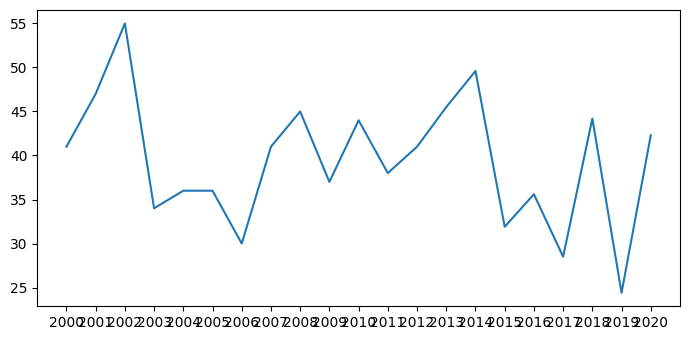

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df_pr_tem_dep_aude = df_pr_tem_dep_aude.astype({'ANNREF':'string'})

plt.plot(df_pr_tem_dep_aude.ANNREF, df_pr_tem_dep_aude.VALEUR)
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd


#fig = px.line(df_pr_tem_dep_aude,x=df_pr_tem_dep_aude.ANNREF, y=df_pr_tem_dep_aude.VALEUR,
#             title="Historique des données de rendement (2000-2020) en prairie temporaire pour le département de l'aude",
#             text="VALEUR")
fig = px.line(df_pr_tem_dep_aude,x=df_pr_tem_dep_aude.ANNREF, y=df_pr_tem_dep_aude.VALEUR,
              title="Historique des données de rendement (2000-2020) en prairie temporaire pour le département de l'aude")

fig.show()

In [ ]:
df.loc[df['DEP'] == '75', 'DEP'] = 'FR101'
df.loc[df['DEP'] == '77', 'DEP'] = 'FR102'
df.loc[df['DEP'] == '78', 'DEP'] = 'FR103'
df.loc[df['DEP'] == '91', 'DEP'] = 'FR104'
df.loc[df['DEP'] == '92', 'DEP'] = 'FR105'
df.loc[df['DEP'] == '93', 'DEP'] = 'FR106'
df.loc[df['DEP'] == '94', 'DEP'] = 'FR107'
df.loc[df['DEP'] == '95', 'DEP'] = 'FR108'

df.loc[df['DEP'] == '08', 'DEP'] = 'FRF21'
df.loc[df['DEP'] == '10', 'DEP'] = 'FRF22'
df.loc[df['DEP'] == '51', 'DEP'] = 'FRF23'
df.loc[df['DEP'] == '52', 'DEP'] = 'FRF24'

df.loc[df['DEP'] == '02', 'DEP'] = 'FRE21'
df.loc[df['DEP'] == '60', 'DEP'] = 'FRE22'
df.loc[df['DEP'] == '80', 'DEP'] = 'FRE23'

df.loc[df['DEP'] == '27', 'DEP'] = 'FRD21 '
df.loc[df['DEP'] == '76', 'DEP'] = 'FRD22'

df.loc[df['DEP'] == '18', 'DEP'] = 'FRB01'
df.loc[df['DEP'] == '28', 'DEP'] = 'FRB02'
df.loc[df['DEP'] == '36', 'DEP'] = 'FRB03'
df.loc[df['DEP'] == '37', 'DEP'] = 'FRB04'
df.loc[df['DEP'] == '41', 'DEP'] = 'FRB05'
df.loc[df['DEP'] == '45', 'DEP'] = 'FRB06'

df.loc[df['DEP'] == '14', 'DEP'] = 'FRD11'
df.loc[df['DEP'] == '50', 'DEP'] = 'FRD12'
df.loc[df['DEP'] == '61', 'DEP'] = 'FRD13'

df.loc[df['DEP'] == '21', 'DEP'] = 'FRC11'
df.loc[df['DEP'] == '58', 'DEP'] = 'FRC12'
df.loc[df['DEP'] == '71', 'DEP'] = 'FRC13'
df.loc[df['DEP'] == '89', 'DEP'] = 'FRC14'

df.loc[df['DEP'] == '59', 'DEP'] = 'FRE11'
df.loc[df['DEP'] == '62', 'DEP'] = 'FRE12'

df.loc[df['DEP'] == '54', 'DEP'] = 'FRF31'
df.loc[df['DEP'] == '55', 'DEP'] = 'FRF32'
df.loc[df['DEP'] == '57', 'DEP'] = 'FRF33'
df.loc[df['DEP'] == '88', 'DEP'] = 'FRF34'

df.loc[df['DEP'] == '67', 'DEP'] = 'FRF11'
df.loc[df['DEP'] == '68', 'DEP'] = 'FRF12'

df.loc[df['DEP'] == '25', 'DEP'] = 'FRC21'
df.loc[df['DEP'] == '39', 'DEP'] = 'FRC22'
df.loc[df['DEP'] == '70', 'DEP'] = 'FRC23'
df.loc[df['DEP'] == '90', 'DEP'] = 'FRC24'

df.loc[df['DEP'] == '44', 'DEP'] = 'FRG01'
df.loc[df['DEP'] == '49', 'DEP'] = 'FRG02'
df.loc[df['DEP'] == '53', 'DEP'] = 'FRG03'
df.loc[df['DEP'] == '72', 'DEP'] = 'FRG04'
df.loc[df['DEP'] == '85', 'DEP'] = 'FRG05'


df.loc[df['DEP'] == '22', 'DEP'] = 'FRH01'
df.loc[df['DEP'] == '29', 'DEP'] = 'FRH02'
df.loc[df['DEP'] == '35', 'DEP'] = 'FRH03'
df.loc[df['DEP'] == '56', 'DEP'] = 'FRH04'

df.loc[df['DEP'] == '16', 'DEP'] = 'FRI31'
df.loc[df['DEP'] == '17', 'DEP'] = 'FRI32'
df.loc[df['DEP'] == '79', 'DEP'] = 'FRI33'
df.loc[df['DEP'] == '86', 'DEP'] = 'FRI34'

df.loc[df['DEP'] == '24', 'DEP'] = 'FRI11'
df.loc[df['DEP'] == '33', 'DEP'] = 'FRI12'
df.loc[df['DEP'] == '40', 'DEP'] = 'FRI13'
df.loc[df['DEP'] == '47', 'DEP'] = 'FRI14'
df.loc[df['DEP'] == '64', 'DEP'] = 'FRI15'

df.loc[df['DEP'] == '09', 'DEP'] = 'FRJ21'
df.loc[df['DEP'] == '12', 'DEP'] = 'FRJ22'
df.loc[df['DEP'] == '31', 'DEP'] = 'FRJ23'
df.loc[df['DEP'] == '32', 'DEP'] = 'FRJ24'
df.loc[df['DEP'] == '46', 'DEP'] = 'FRJ25'
df.loc[df['DEP'] == '65', 'DEP'] = 'FRJ26'
df.loc[df['DEP'] == '81', 'DEP'] = 'FRJ27'
df.loc[df['DEP'] == '82', 'DEP'] = 'FRJ28'

df.loc[df['DEP'] == '19', 'DEP'] = 'FRI21'
df.loc[df['DEP'] == '23', 'DEP'] = 'FRI22'
df.loc[df['DEP'] == '87', 'DEP'] = 'FRI23'

df.loc[df['DEP'] == '01', 'DEP'] = 'FRK21'
df.loc[df['DEP'] == '07', 'DEP'] = 'FRK22'
df.loc[df['DEP'] == '26', 'DEP'] = 'FRK23'
df.loc[df['DEP'] == '38', 'DEP'] = 'FRK24'
df.loc[df['DEP'] == '42', 'DEP'] = 'FRK25'
df.loc[df['DEP'] == '69', 'DEP'] = 'FRK26'
df.loc[df['DEP'] == '73', 'DEP'] = 'FRK27'
df.loc[df['DEP'] == '74', 'DEP'] = 'FRK28'

df.loc[df['DEP'] == '03', 'DEP'] = 'FRK11'
df.loc[df['DEP'] == '15', 'DEP'] = 'FRK12'
df.loc[df['DEP'] == '43', 'DEP'] = 'FRK13'
df.loc[df['DEP'] == '63', 'DEP'] = 'FRK14'

df.loc[df['DEP'] == '11', 'DEP'] = 'FRJ11'
df.loc[df['DEP'] == '30', 'DEP'] = 'FRJ12'
df.loc[df['DEP'] == '34', 'DEP'] = 'FRJ13'
df.loc[df['DEP'] == '48', 'DEP'] = 'FRJ14'
df.loc[df['DEP'] == '66', 'DEP'] = 'FRJ15'

df.loc[df['DEP'] == '04', 'DEP'] = 'FRL01'
df.loc[df['DEP'] == '05', 'DEP'] = 'FRL02'
df.loc[df['DEP'] == '06', 'DEP'] = 'FRL03'
df.loc[df['DEP'] == '13', 'DEP'] = 'FRL04'
df.loc[df['DEP'] == '83', 'DEP'] = 'FRL05'
df.loc[df['DEP'] == '84', 'DEP'] = 'FRL06'

df.loc[df['DEP'] == '2A', 'DEP'] = 'FRM01'
df.loc[df['DEP'] == '2B', 'DEP'] = 'FRM02'



In [ ]:
df.loc[df['REGION'] == 'NR01', 'REGION'] = 'FRY1'
df.loc[df['REGION'] == 'NR02', 'REGION'] = 'FRY2'
df.loc[df['REGION'] == 'NR03', 'REGION'] = 'FRY3'
df.loc[df['REGION'] == 'NR04', 'REGION'] = 'FRY4'
df.loc[df['REGION'] == 'NR06', 'REGION'] = 'FRY5'
df.loc[df['REGION'] == 'NR11', 'REGION'] = 'FR1'
df.loc[df['REGION'] == 'NR24', 'REGION'] = 'FRB'
df.loc[df['REGION'] == 'NR27', 'REGION'] = 'FRC'
df.loc[df['REGION'] == 'NR28', 'REGION'] = 'FRD'
df.loc[df['REGION'] == 'NR32', 'REGION'] = 'FRE'
df.loc[df['REGION'] == 'NR44', 'REGION'] = 'FRF'
df.loc[df['REGION'] == 'NR52', 'REGION'] = 'FRG'
df.loc[df['REGION'] == 'NR53', 'REGION'] = 'FRH'
df.loc[df['REGION'] == 'NR75', 'REGION'] = 'FRI'
df.loc[df['REGION'] == 'NR76', 'REGION'] = 'FRJ'
df.loc[df['REGION'] == 'NR84', 'REGION'] = 'FRK'
df.loc[df['REGION'] == 'NR93', 'REGION'] = 'FRL'
df.loc[df['REGION'] == 'NR94', 'REGION'] = 'FRM'

In [ ]:
#get data from culture and rendement
df_pr_tem=df[(df.N306_MOD=='culture numero')&(df.N027_MOD==70.02)]

In [12]:
pip install reverse_geocoder

In [52]:
#reverse geocoding

# Python3 program for reverse geocoding.

# importing necessary libraries
import reverse_geocoder as rg
import pprint

def reverseGeocode(coordinates):
  result = rg.search(coordinates)
  # result is a list containing ordered dictionary.
  return result


In [58]:
# Coordinates tuple.Can contain more than one pair.
coordinates =(48.788468, 2.429216)

res_loc=reverseGeocode(coordinates)
res_loc


[{'lat': '48.80575',
  'lon': '2.4204',
  'name': 'Alfortville',
  'admin1': 'Ile-de-France',
  'admin2': 'Departement du Val-de-Marne',
  'cc': 'FR'}]

In [60]:
#get the name of department and region
dep=res_loc[0]["admin2"].split()[-1]
region=res_loc[0]["admin1"]